# Exercise 4 : Linear Regression

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is `train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

## Problem 1 : Predicting SalePrice using GrLivArea

Plot `SalePrice` against `GrLivArea` using standard ScatterPlot/JointPlot.

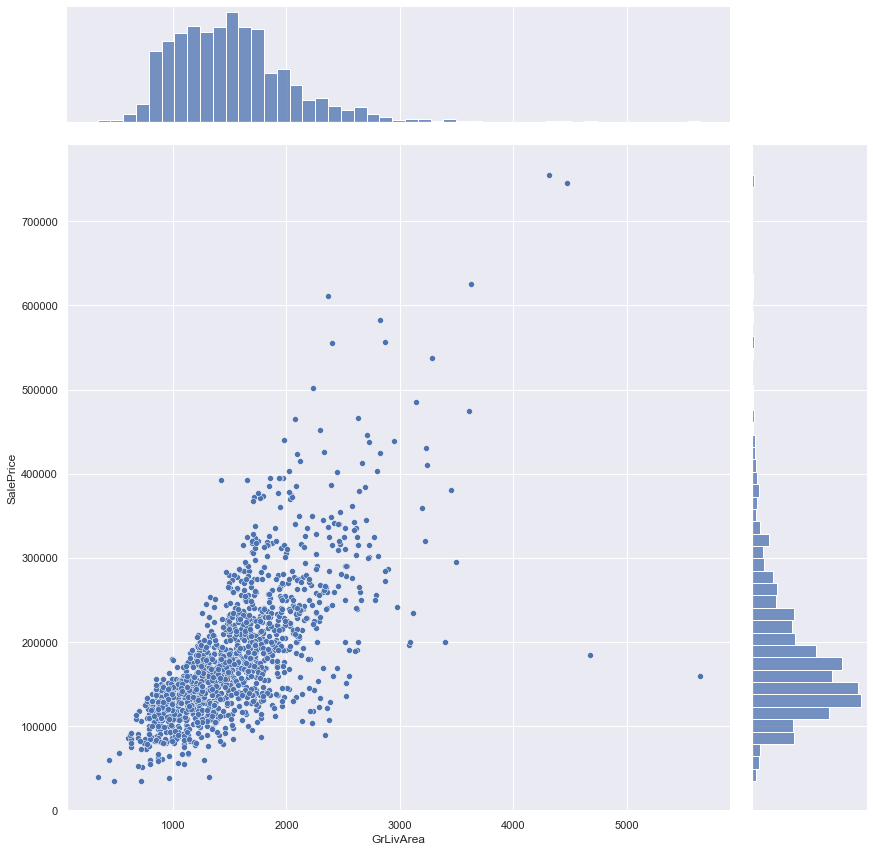

In [3]:
sb.jointplot(data = houseData, x = "GrLivArea", y = "SalePrice", height = 12)

Check the Correlation Coefficient to get a confirmation on the strong linear relationship you observe.

In [4]:
houseData.SalePrice.corr(houseData.GrLivArea)

0.7086244776126522

Import the `LinearRegression` model from `sklearn.linear_model`.

In [5]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

Split the dataset in Train and Test sets, uniformly at random.   
Train Set with 1100 samples and Test Set with 360 samples.     

In [6]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData['GrLivArea'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


Fit Linear Regression model on the Training Dataset.

In [7]:
linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Check the coefficients of the Linear Regression model you just fit.

In [8]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [22250.58167764]
Coefficients 	: a =  [[104.63560639]]


Plot the regression line based on the coefficients-intercept form.

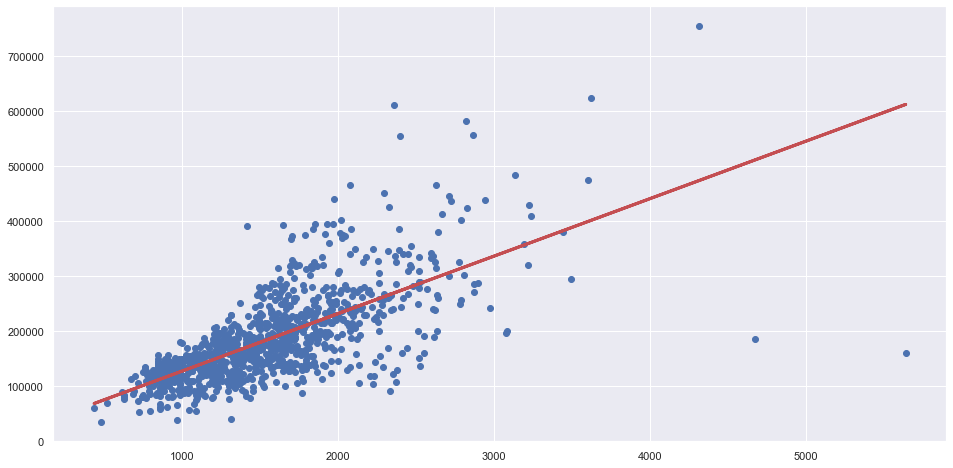

In [9]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Train Set.    
Metric : Explained Variance or R^2 on the Train Set.

In [10]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

Explained Variance (R^2) 	: 0.4853900207351318


Metric : Mean Squared Error (MSE) on the Train Set.

In [11]:
# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Mean Squared Error (MSE) 	: 3265166496.8278713


#### Prediction of Response based on the Predictor

Predict `SalePrice` given `GrLivArea` in the Test dataset.

In [12]:
# Predict SalePrice values corresponding to GrLivArea
y_test_pred = linreg.predict(X_test)

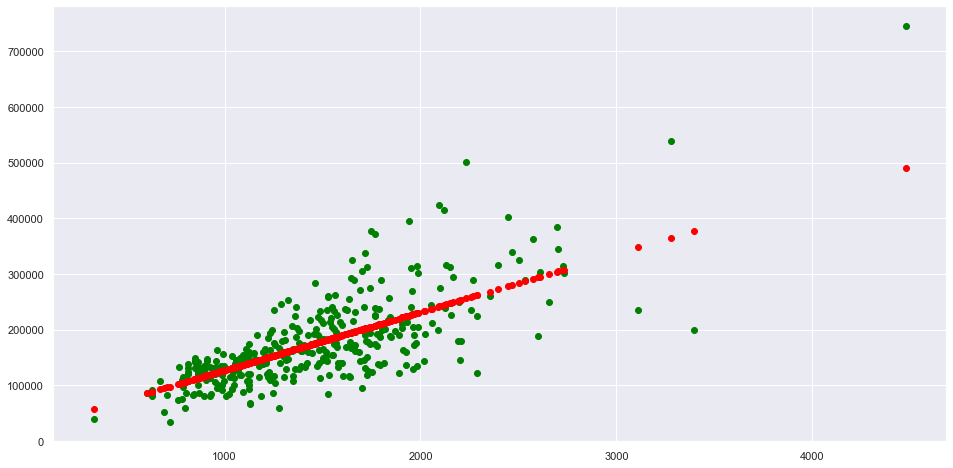

In [13]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Test Set.    
Metric : Mean Squared Error (MSE) on the Train Set.

In [14]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 2763915807.6575723


---

## Problem 2 : Predicting SalePrice using LotArea

Check the relationship between the two variables : `SalePrice` and the Predictor.     

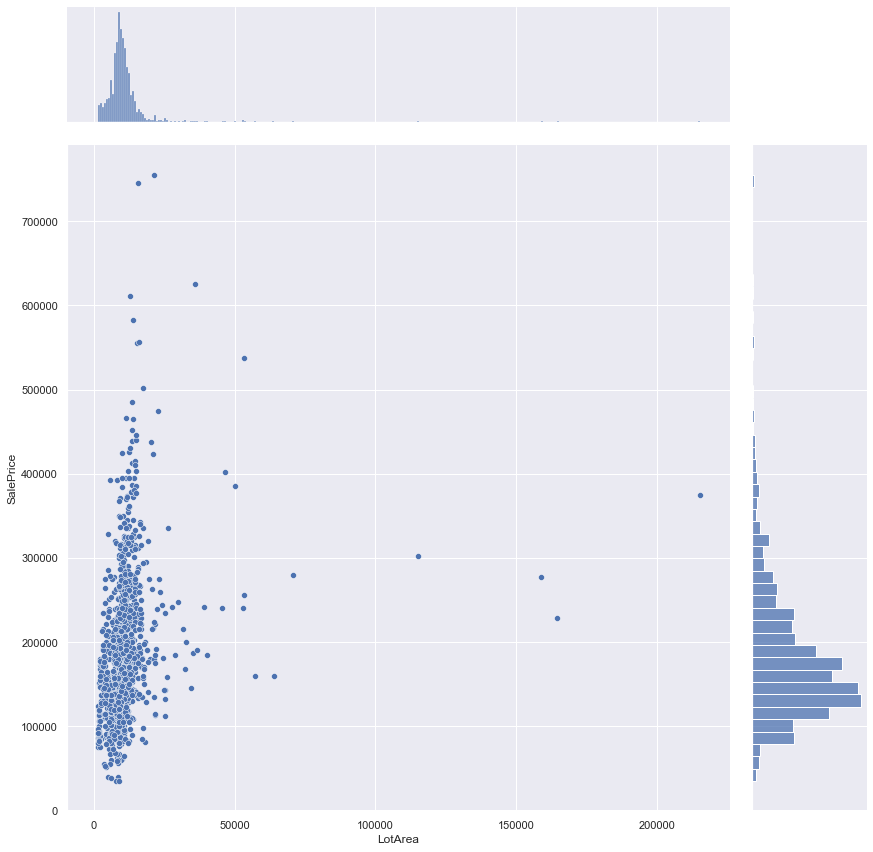

In [15]:
sb.jointplot(data = houseData, x = "LotArea", y = "SalePrice", height = 12)

In [16]:
houseData.SalePrice.corr(houseData.LotArea)

0.2638433538714057

#### Linear Regression on SalePrice vs Predictor   

In [17]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData['LotArea'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [18]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Intercept 	: b =  [162021.04727144]
Coefficients 	: a =  [[1.97420695]]


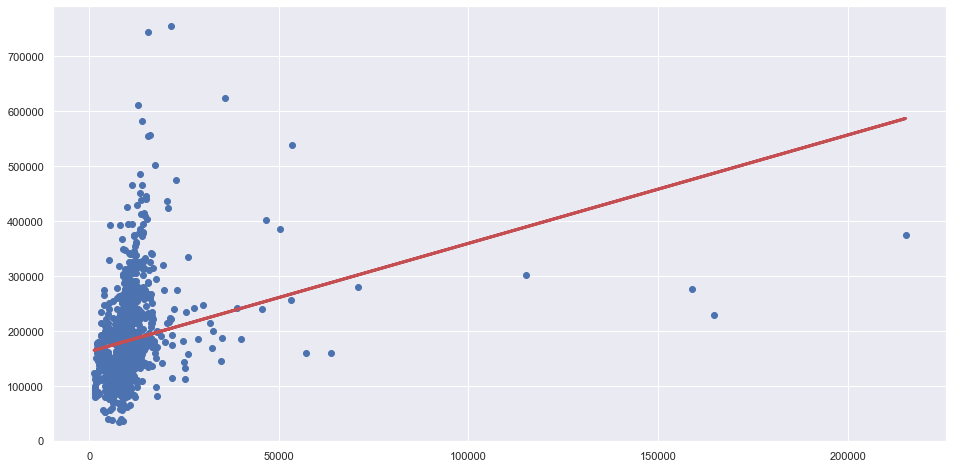

In [19]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Train Set.    
Metric : Explained Variance or R^2 on the Train Set.   
Metric : Mean Squared Error (MSE) on the Train Set.   

In [20]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Explained Variance (R^2) 	: 0.07046178817160409
Mean Squared Error (MSE) 	: 6422268153.421908


#### Prediction of Response based on the Predictor

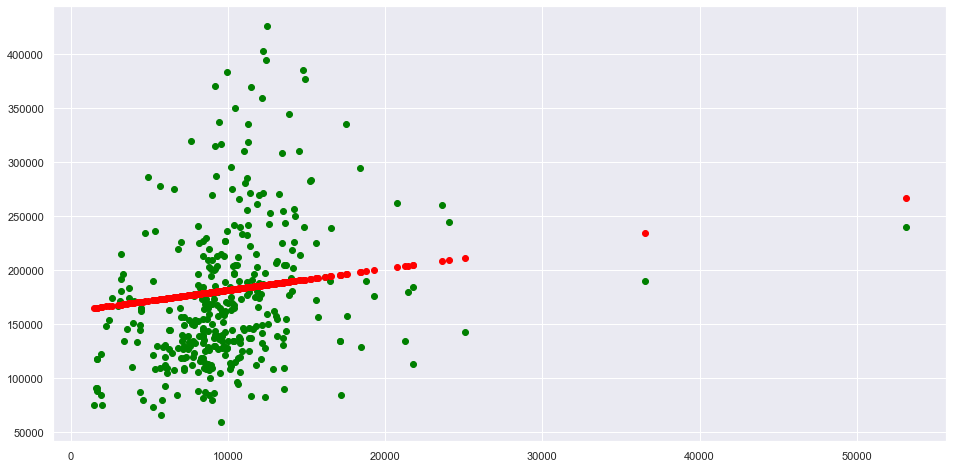

In [21]:
# Predict SalePrice values corresponding to Predictor
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Test Set.    
Metric : Mean Squared Error (MSE) on the Train Set.

In [22]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 4193848310.9854517


---

## Problem 2 : Predicting SalePrice using TotalBsmtSF

Check the relationship between the two variables : `SalePrice` and the Predictor.     

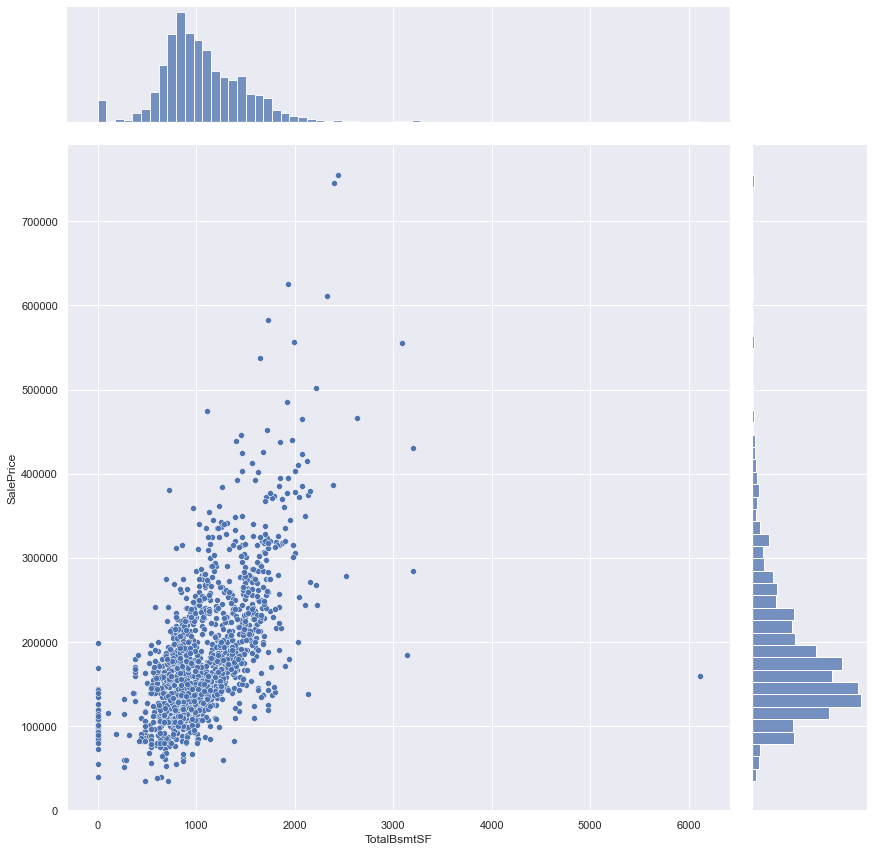

In [23]:
sb.jointplot(data = houseData, x = "TotalBsmtSF", y = "SalePrice", height = 12)

In [24]:
houseData.SalePrice.corr(houseData.TotalBsmtSF)

0.6135805515591952

#### Linear Regression on SalePrice vs Predictor   

In [25]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData['TotalBsmtSF'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [26]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Intercept 	: b =  [67326.26238938]
Coefficients 	: a =  [[107.39465613]]


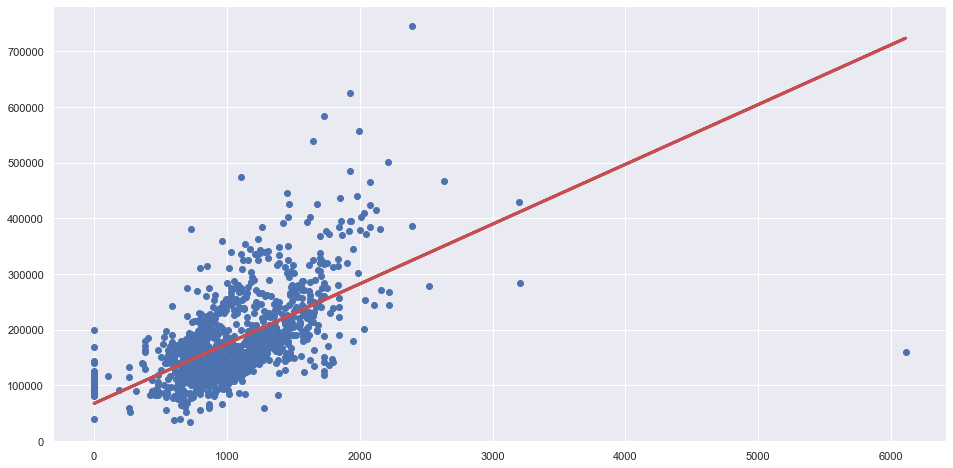

In [27]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Train Set.    
Metric : Explained Variance or R^2 on the Train Set.   
Metric : Mean Squared Error (MSE) on the Train Set.   

In [28]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Explained Variance (R^2) 	: 0.3586140659639663
Mean Squared Error (MSE) 	: 4018563897.0038958


#### Prediction of Response based on the Predictor

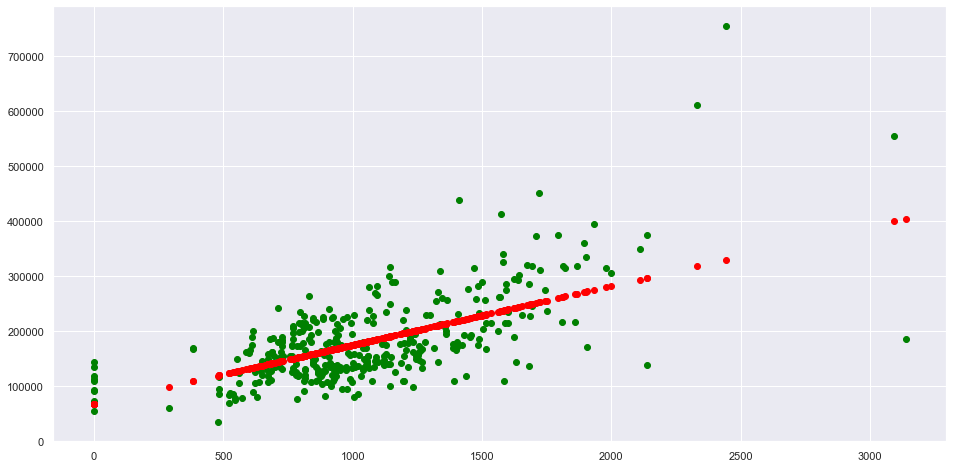

In [29]:
# Predict SalePrice values corresponding to Predictor
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Test Set.    
Metric : Mean Squared Error (MSE) on the Train Set.

In [30]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 3679898304.9858017


---

## Problem 2 : Predicting SalePrice using GarageArea

Check the relationship between the two variables : `SalePrice` and the Predictor.     

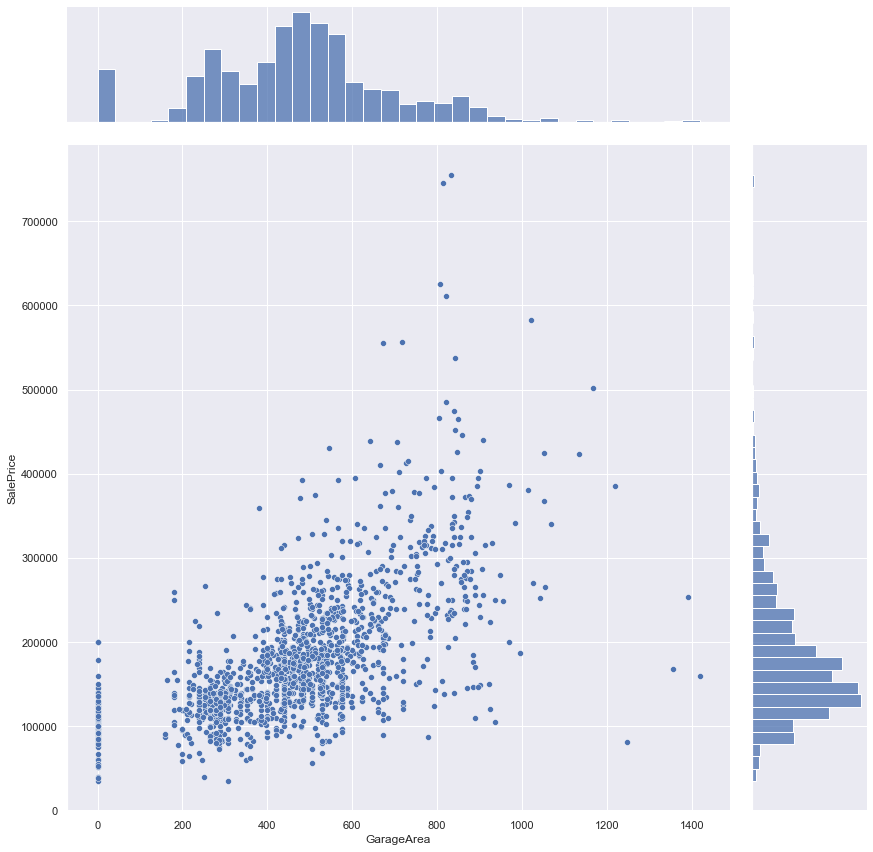

In [31]:
sb.jointplot(data = houseData, x = "GarageArea", y = "SalePrice", height = 12)

In [32]:
houseData.SalePrice.corr(houseData.GarageArea)

0.6234314389183618

#### Linear Regression on SalePrice vs Predictor   

In [33]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData['GarageArea'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [34]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

Intercept 	: b =  [72017.38118833]
Coefficients 	: a =  [[230.69014279]]


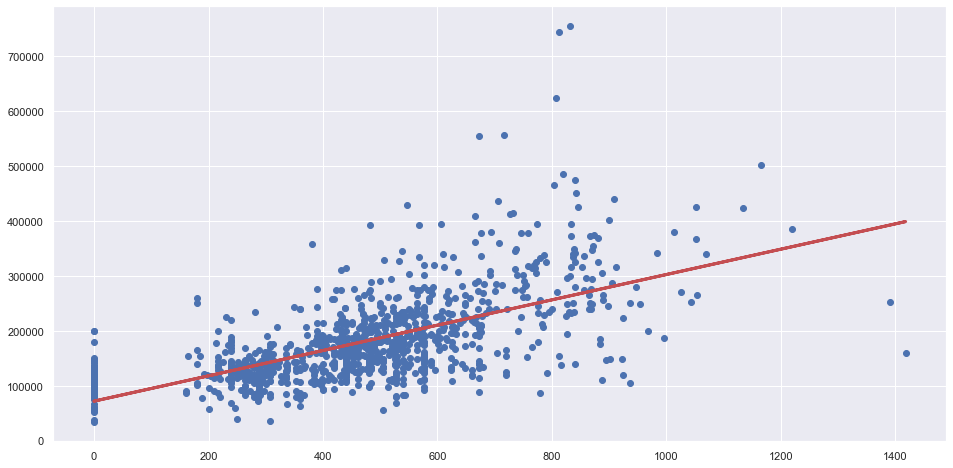

In [35]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Train Set.    
Metric : Explained Variance or R^2 on the Train Set.   
Metric : Mean Squared Error (MSE) on the Train Set.   

In [36]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Explained Variance (R^2) 	: 0.38923246326070116
Mean Squared Error (MSE) 	: 3833013943.061865


#### Prediction of Response based on the Predictor

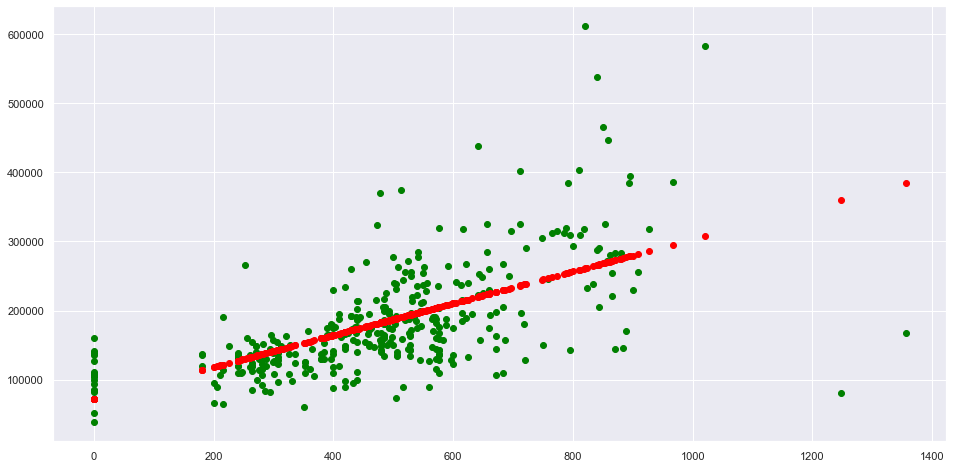

In [37]:
# Predict SalePrice values corresponding to Predictor
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Test Set.    
Metric : Mean Squared Error (MSE) on the Train Set.

In [38]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 3924752829.705528


---

## Problem 3 : Comparing the Uni-Variate Linear Models

Compare and contrast the four models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `SalePrice` vs `GrLivArea` has the best Explained Variance (R^2) out of the four models.   
* `SalePrice` vs `LotArea` has the worst Explained Variance (R^2) out of the four models.   
* Naturally, the model with `GrLivArea` is the best one in terms of just the Training accuracy.    


* We also find `SalePrice` vs `GrLivArea` has the minimum MSE on both the Train and Test Sets compared to other models.   
* We also find `SalePrice` vs `LotArea` has the maximum MSE on both the Train and Test Sets compared to other models.   
* Naturally, the model with `GrLivArea` is the best one in terms of Test accuracy as evident from MSE (error) on the Test Set.    

So, overall, the predictor `GrLivArea` is the best amongst the four in predicting `SalePrice`.      

**Did you notice?** : Go back and check again the R^2 and MSE values for the four models. I am pretty sure you did not get the exact same values as I did. This is due to the random selection of Train-Test sets. In fact, if you run the above cells again, you will get a different set of R^2 and MSE values. If that is so, can we *really* be confident that `GrLivArea` will always be the best variable to predict `SalePrice`? Think about it. ;-)

---

## Extra : Predicting SalePrice using Multiple Variables

Extract the required variables from the dataset, and then perform Multi-Variate Regression.     

In [39]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['SalePrice'])
X = pd.DataFrame(houseData[['GrLivArea','LotArea','TotalBsmtSF','GarageArea']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (1100, 4) (1100, 1)
Test Set  : (360, 4) (360, 1)


LinearRegression()

#### Coefficients of the Linear Regression Model

Note that you CANNOT visualize the model as a line on a 2D plot, as it is a multi-dimensional surface.

In [40]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-21870.68522239]
Coefficients 	: a =  [[ 69.11204083   0.21079582  45.62149497 101.9864399 ]]


#### Prediction of Response based on the Predictor

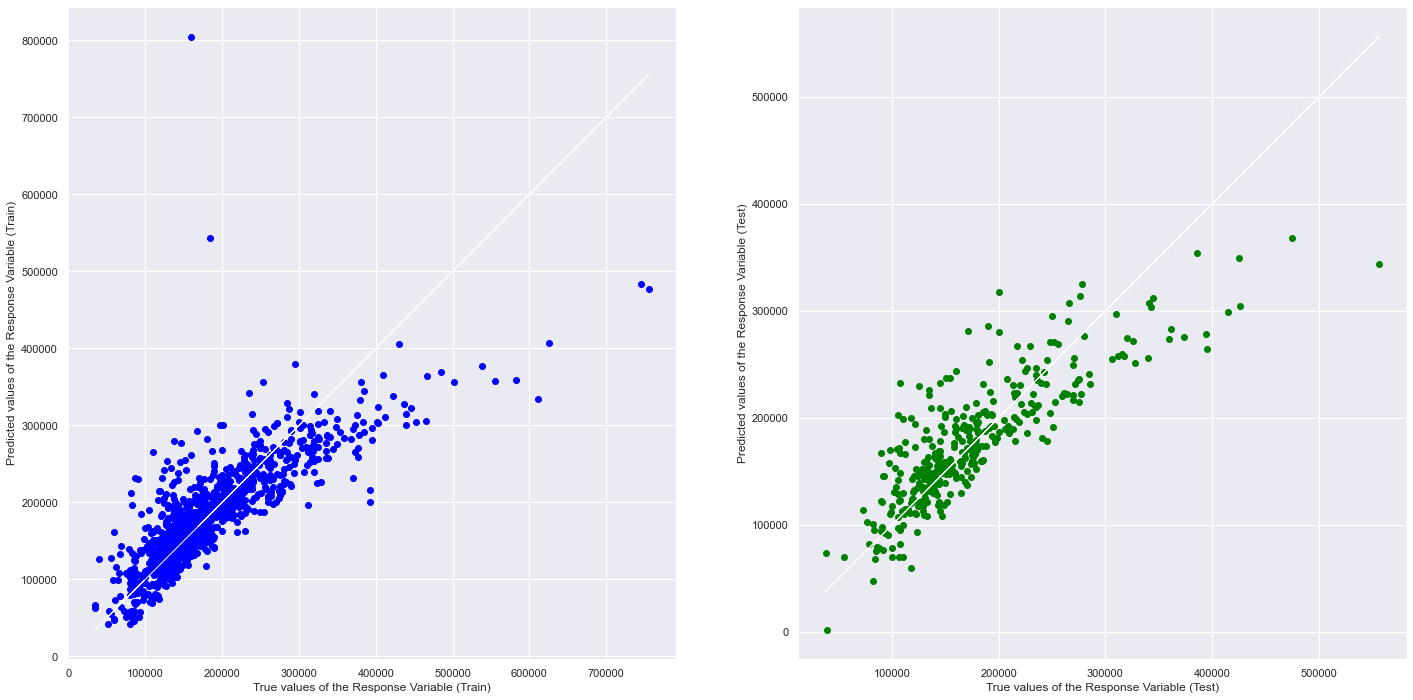

In [41]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [42]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.651419459356217
Mean Squared Error (MSE) on Train Set 	: 2322422482.5305724
Mean Squared Error (MSE) on Test Set 	: 1537273985.5978584


**Observation** : The model with `SalePrice` against all the four variables `GrLivArea`, `LotArea`, `TotalBsmtSF`, `GarageArea` is definitely better!

# Exercise 5 : Classification Tree

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [43]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics



## Setup : Import the Dataset

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is `train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [44]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Problem 1 : Predicting CentralAir using SalePrice

Explore the variable `CentralAir` from the dataset, as mentioned in the problem.     

In [45]:
houseData['CentralAir'].describe()

count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object

Check the `catplot` for `CentralAir`, to visually understand the distribution.

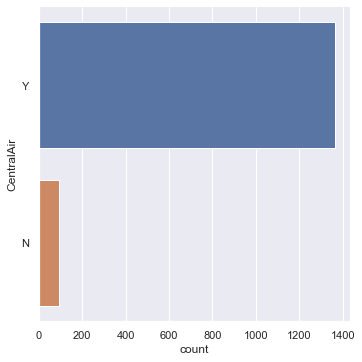

In [46]:
sb.catplot(y = 'CentralAir', data = houseData, kind = "count")

Print the ratio `Y` : `N` for `CentralAir` to check the imbalance in the classes.

In [47]:
countY, countX = houseData.CentralAir.value_counts()
print("Ratio of classes is Y : N = ", countY, ":", countX)

Ratio of classes is Y : N =  1365 : 95


Plot `CentralAir` against `SalePrice` to visualize their mutual relationship.

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

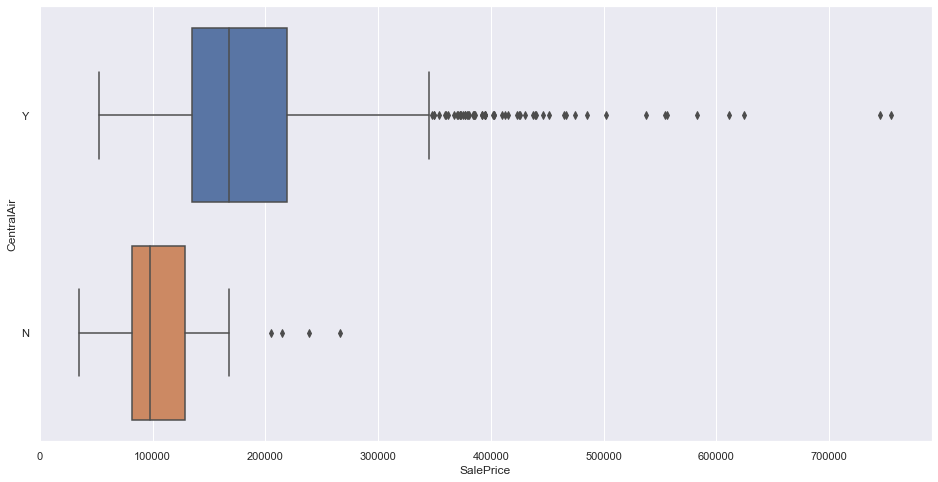

In [48]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'SalePrice', y = 'CentralAir', data = houseData)

Good to note that the two boxplots for `SalePrice`, for `CentralAir = Y` and `CentralAir = N`, are different from one another in terms of their median value, as well as spread. This means that `CentralAir` has an effect on `SalePrice`, and hence, `SalePrice` will probably be an important variable in predicting `CentralAir`. Boxplots do not tell us where to make the cuts though -- it will be easier to visualize in the following `swarmplot`.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

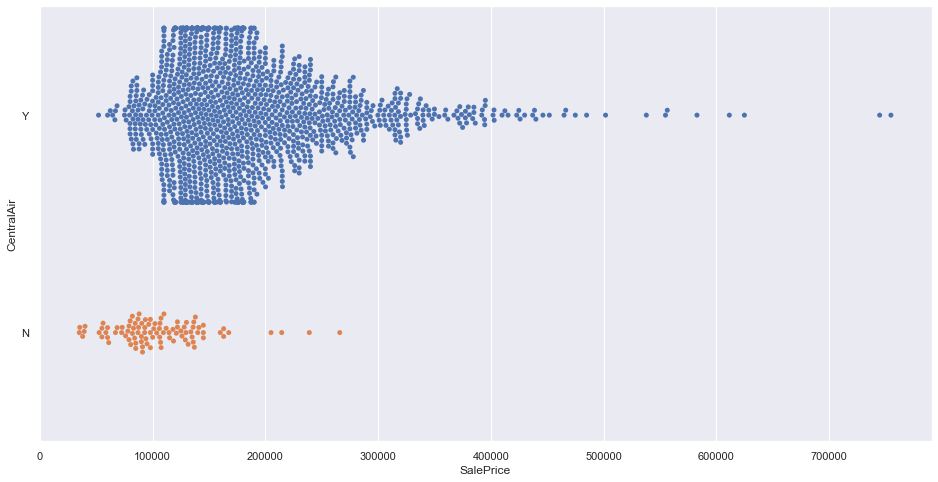

In [49]:
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'SalePrice', y = 'CentralAir', data = houseData)

Hmm, it seems that swarmplot asks you to decrease the size of the markers or use `stripplot`. What is this `stripplot` anyway? Let's check.

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

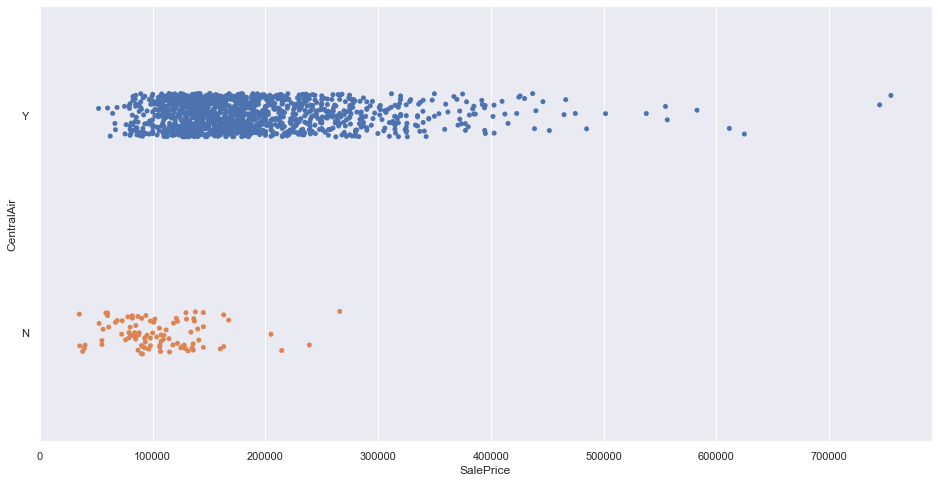

In [50]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'SalePrice', y = 'CentralAir', data = houseData)

Now it's time to build the Decision Tree classifier. Import the `DecisionTreeClassifier` model from `sklearn.tree`.

In [51]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
# you can change the max_depth as you wish
dectree = DecisionTreeClassifier(max_depth = 2)

Split the dataset in Train and Test sets, uniformly at random.      
Train Set with 1100 samples and Test Set with 360 samples.

In [52]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData['SalePrice'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


Fit Decision Tree Classifier model on the Train Dataset.   

In [53]:
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

#### Visual Representation of the Decision Tree Model

[Text(334.8, 543.6, 'SalePrice <= 98300.0\ngini = 0.127\nsamples = 1100\nvalue = [75, 1025]\nclass = Y'),
 Text(167.4, 326.16, 'SalePrice <= 61691.5\ngini = 0.497\nsamples = 84\nvalue = [39, 45]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.478\nsamples = 71\nvalue = [28, 43]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 137950.0\ngini = 0.068\nsamples = 1016\nvalue = [36, 980]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.18\nsamples = 270\nvalue = [27, 243]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.024\nsamples = 746\nvalue = [9, 737]\nclass = Y')]

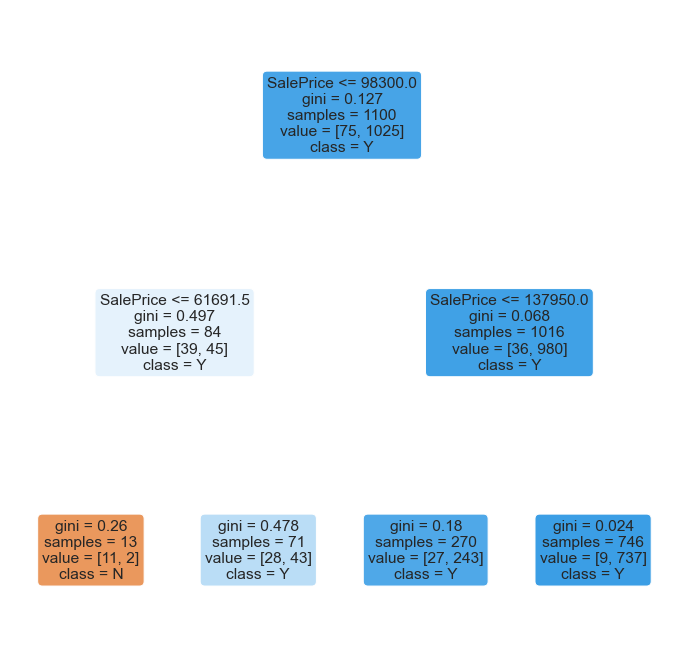

In [54]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

#### Prediction on Train Data and Goodness of Fit

Check how good the predictions are on the Train Set.    
Metrics : Classification Accuracy and Confusion Matrix.

<AxesSubplot:>

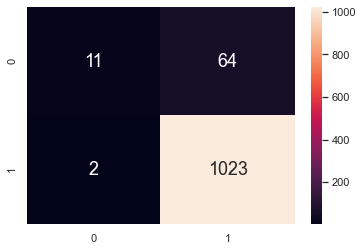

In [55]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

In [56]:
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.94

TPR Train :	 0.9980487804878049
TNR Train :	 0.14666666666666667

FPR Train :	 0.8533333333333334
FNR Train :	 0.001951219512195122


#### Prediction on Test Data and Goodness of Fit

Check how good the predictions are on the Test Set.    
Metrics : Classification Accuracy and Confusion Matrix.

<AxesSubplot:>

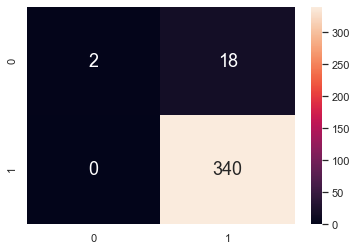

In [57]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

In [58]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.95

TPR Test :	 1.0
TNR Test :	 0.1

FPR Test :	 0.9
FNR Test :	 0.0


**Important** : Note the huge imbalance in the *False Positives* and *False Negatives* in the confusion matrix. *False Positives* are much higher in number than *False Negatives* in both Train and Test data. This is not surprising -- actually, this is a direct effect of the huge `Y` vs `N` class imbalance in the response variable `CentralAir`. As `CentralAir = Y` was more likely in the data, *False Positives* are more likely too. Think about how you can fix it!

## Problem 2 : Predicting CentralAir using Other Variables

Use the other variables from the dataset to predict `CentralAir`, as mentioned in the problem.

### Predicting CentralAir using GrLivArea

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='GrLivArea', ylabel='CentralAir'>

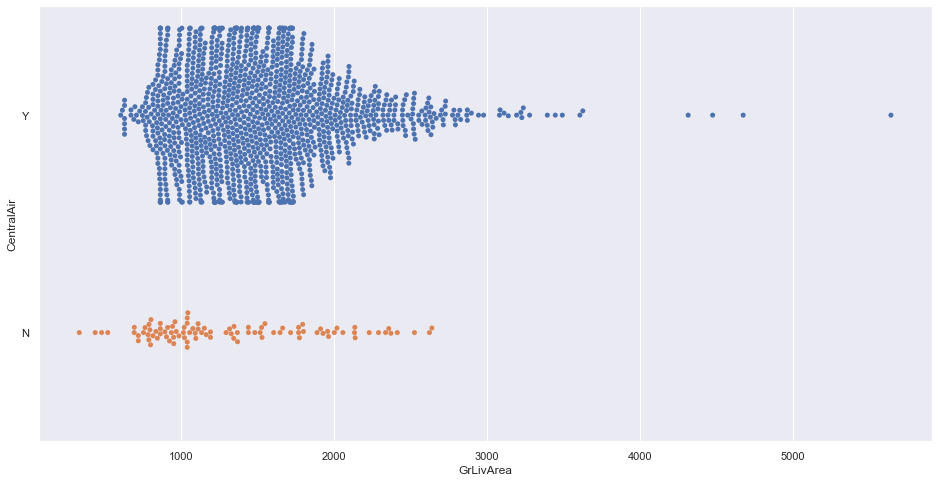

In [59]:
# Plot Response against Predictor to visualize their mutual relationship.
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'GrLivArea', y = 'CentralAir', data = houseData)

In [60]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData['GrLivArea'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'GrLivArea <= 803.5\ngini = 0.132\nsamples = 1100\nvalue = [78, 1022]\nclass = Y'),
 Text(167.4, 326.16, 'GrLivArea <= 562.5\ngini = 0.457\nsamples = 34\nvalue = [12, 22]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.412\nsamples = 31\nvalue = [9, 22]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'GrLivArea <= 1111.5\ngini = 0.116\nsamples = 1066\nvalue = [66, 1000]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.185\nsamples = 232\nvalue = [24, 208]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.096\nsamples = 834\nvalue = [42, 792]\nclass = Y')]

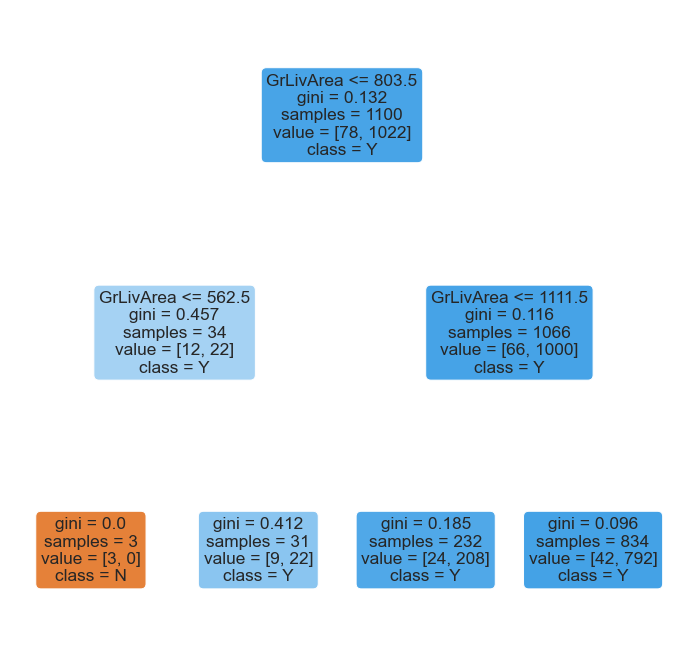

In [61]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9318181818181818

TPR Train :	 1.0
TNR Train :	 0.038461538461538464

FPR Train :	 0.9615384615384616
FNR Train :	 0.0


<AxesSubplot:>

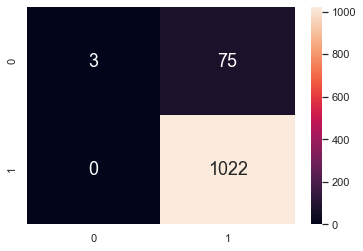

In [62]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9555555555555556

TPR Test :	 1.0
TNR Test :	 0.058823529411764705

FPR Test :	 0.9411764705882353
FNR Test :	 0.0


<AxesSubplot:>

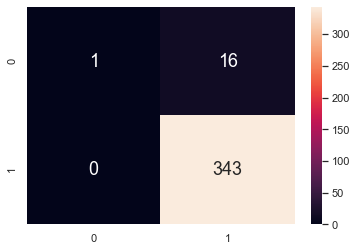

In [63]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Predicting CentralAir using OverallQual

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 83.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='OverallQual', ylabel='CentralAir'>

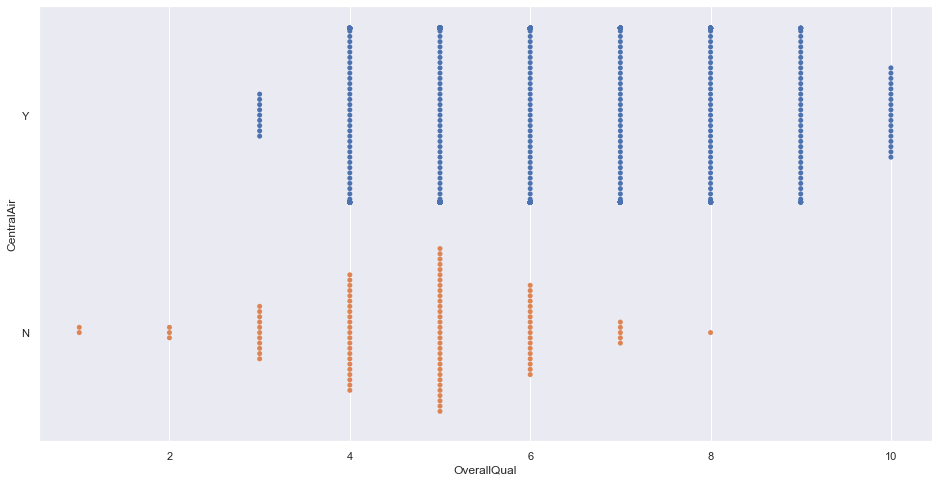

In [64]:
# Plot Response against Predictor to visualize their mutual relationship.
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'OverallQual', y = 'CentralAir', data = houseData)

In [65]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData['OverallQual'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'OverallQual <= 3.5\ngini = 0.119\nsamples = 1100\nvalue = [70, 1030]\nclass = Y'),
 Text(167.4, 326.16, 'OverallQual <= 2.5\ngini = 0.465\nsamples = 19\nvalue = [12, 7]\nclass = N'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]\nclass = N'),
 Text(502.20000000000005, 326.16, 'OverallQual <= 4.5\ngini = 0.102\nsamples = 1081\nvalue = [58, 1023]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.328\nsamples = 87\nvalue = [18, 69]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.077\nsamples = 994\nvalue = [40, 954]\nclass = Y')]

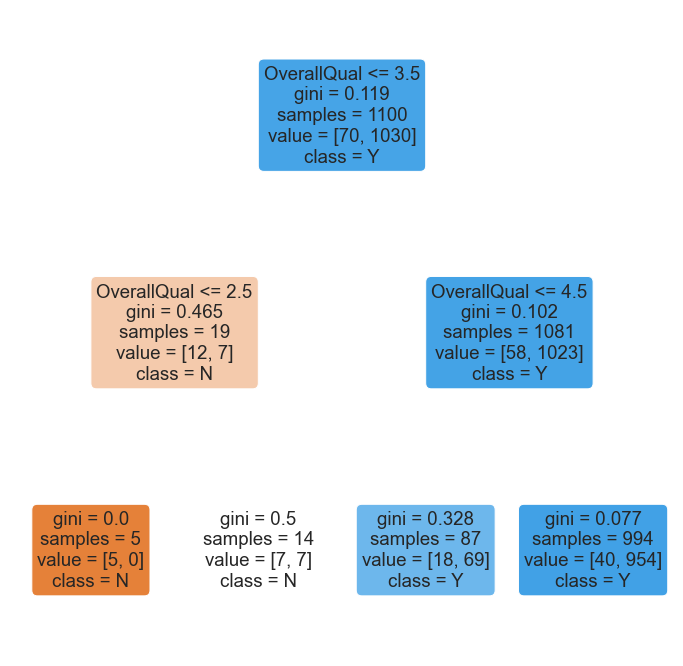

In [66]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9409090909090909

TPR Train :	 0.9932038834951457
TNR Train :	 0.17142857142857143

FPR Train :	 0.8285714285714286
FNR Train :	 0.006796116504854369


<AxesSubplot:>

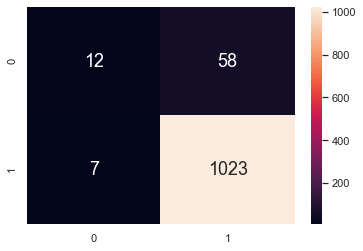

In [67]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9361111111111111

TPR Test :	 0.9940298507462687
TNR Test :	 0.16

FPR Test :	 0.84
FNR Test :	 0.005970149253731343


<AxesSubplot:>

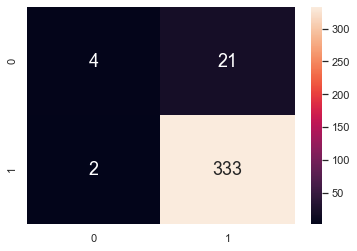

In [68]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Predicting CentralAir using YearBuilt

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='YearBuilt', ylabel='CentralAir'>

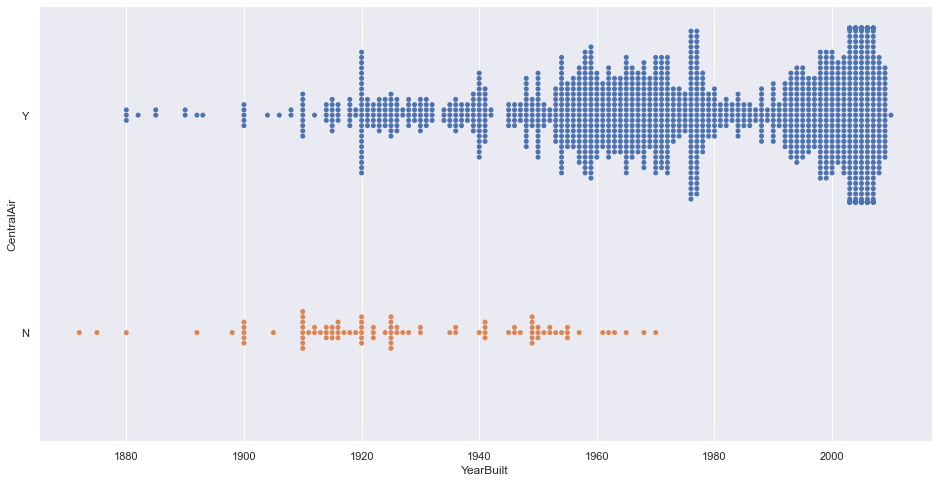

In [69]:
# Plot Response against Predictor to visualize their mutual relationship.
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'YearBuilt', y = 'CentralAir', data = houseData)

In [70]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData['YearBuilt'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'YearBuilt <= 1955.5\ngini = 0.119\nsamples = 1100\nvalue = [70, 1030]\nclass = Y'),
 Text(167.4, 326.16, 'YearBuilt <= 1917.5\ngini = 0.333\nsamples = 303\nvalue = [64, 239]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.495\nsamples = 58\nvalue = [26, 32]\nclass = Y'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.262\nsamples = 245\nvalue = [38, 207]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'YearBuilt <= 1970.5\ngini = 0.015\nsamples = 797\nvalue = [6, 791]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.053\nsamples = 222\nvalue = [6, 216]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.0\nsamples = 575\nvalue = [0, 575]\nclass = Y')]

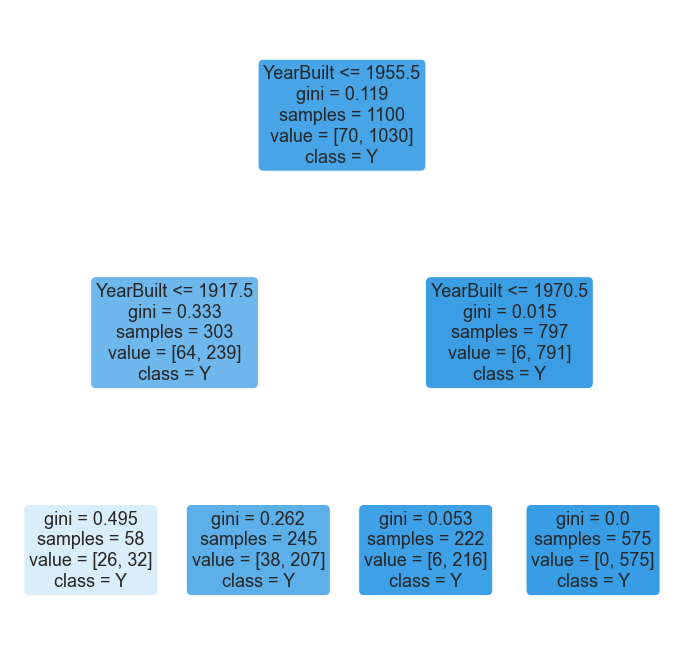

In [71]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9363636363636364

TPR Train :	 1.0
TNR Train :	 0.0

FPR Train :	 1.0
FNR Train :	 0.0


<AxesSubplot:>

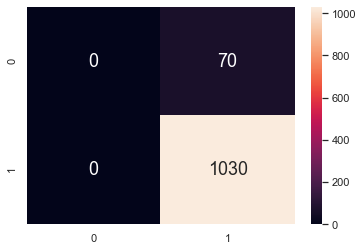

In [72]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9305555555555556

TPR Test :	 1.0
TNR Test :	 0.0

FPR Test :	 1.0
FNR Test :	 0.0


<AxesSubplot:>

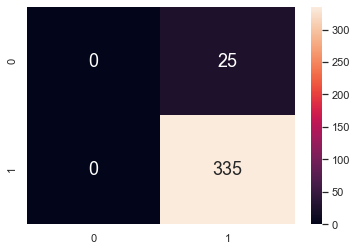

In [73]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Problem 3 : Comparing the Uni-Variate Decision Tree Models

Compare and contrast the four models in terms of Classification Accuracy, TPR and FPR on both Train and Test Data.

* `CentralAir` vs `SalePrice` has the highest Training Accuracy out of the four models.
* `CentralAir` vs `GrLivArea` has the highest Test Accuracy out of the four models.
* However, the train and test accuracy for all four models are pretty high and quite close.
* So, it is not easy to justify which model is better just using their classification accuracy.


However, if we look at the True Positive Rate (TPR) and False Positive Rate (FPR) of the four models, we find that

* `YearBuilt` yields a TPR of 1 (best-case) but an FPR of 1 (worst-case) on both Train and Test data. Really bad for prediction.
* `GrLivArea` yields a TPR of close to 1 (best-case) but an FPR of close to 1 (worst-case) on Train and Test set, not good either.
* `SalePrice` and `OverallQual` yield the best TPR (high) vs FPR (not-as-high) trade-off in case of both Train and Test data.

Overall, the predictor `OverallQual` is the best amongst the four in predicting `CentralAir`, while `SalePrice` is a close second as per the models above. `YearBuilt` is definitely the worst predictor out of these four variables, with `GrLivArea` not doing so well either, given the models above.

**Did you notice?** : Go back and check again all accuracy figures for the four models. I am pretty sure you did not get the exact same values as I did. This is due to the random selection of Train-Test sets. In fact, if you run the above cells again, you will get a different set of accuracy figures. If that is so, can we really be confident that `OverallQual` will always be the best variable to predict `CentralAir`? Think about it. ;-)

## Extra : Predicting CentralAir using All Variables

Use all the other variables from the dataset to predict `CentralAir`, as mentioned in the problem.     

In [74]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData[['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2)

[Text(669.6, 1087.2, 'SalePrice <= 107750.0\ngini = 0.129\nsamples = 1100\nvalue = [76, 1024]\nclass = Y'),
 Text(334.8, 652.32, 'YearBuilt <= 1957.5\ngini = 0.465\nsamples = 114\nvalue = [42, 72]\nclass = Y'),
 Text(167.4, 217.44000000000005, 'gini = 0.499\nsamples = 85\nvalue = [41, 44]\nclass = Y'),
 Text(502.20000000000005, 217.44000000000005, 'gini = 0.067\nsamples = 29\nvalue = [1, 28]\nclass = Y'),
 Text(1004.4000000000001, 652.32, 'YearBuilt <= 1919.5\ngini = 0.067\nsamples = 986\nvalue = [34, 952]\nclass = Y'),
 Text(837.0, 217.44000000000005, 'gini = 0.46\nsamples = 53\nvalue = [19, 34]\nclass = Y'),
 Text(1171.8, 217.44000000000005, 'gini = 0.032\nsamples = 933\nvalue = [15, 918]\nclass = Y')]

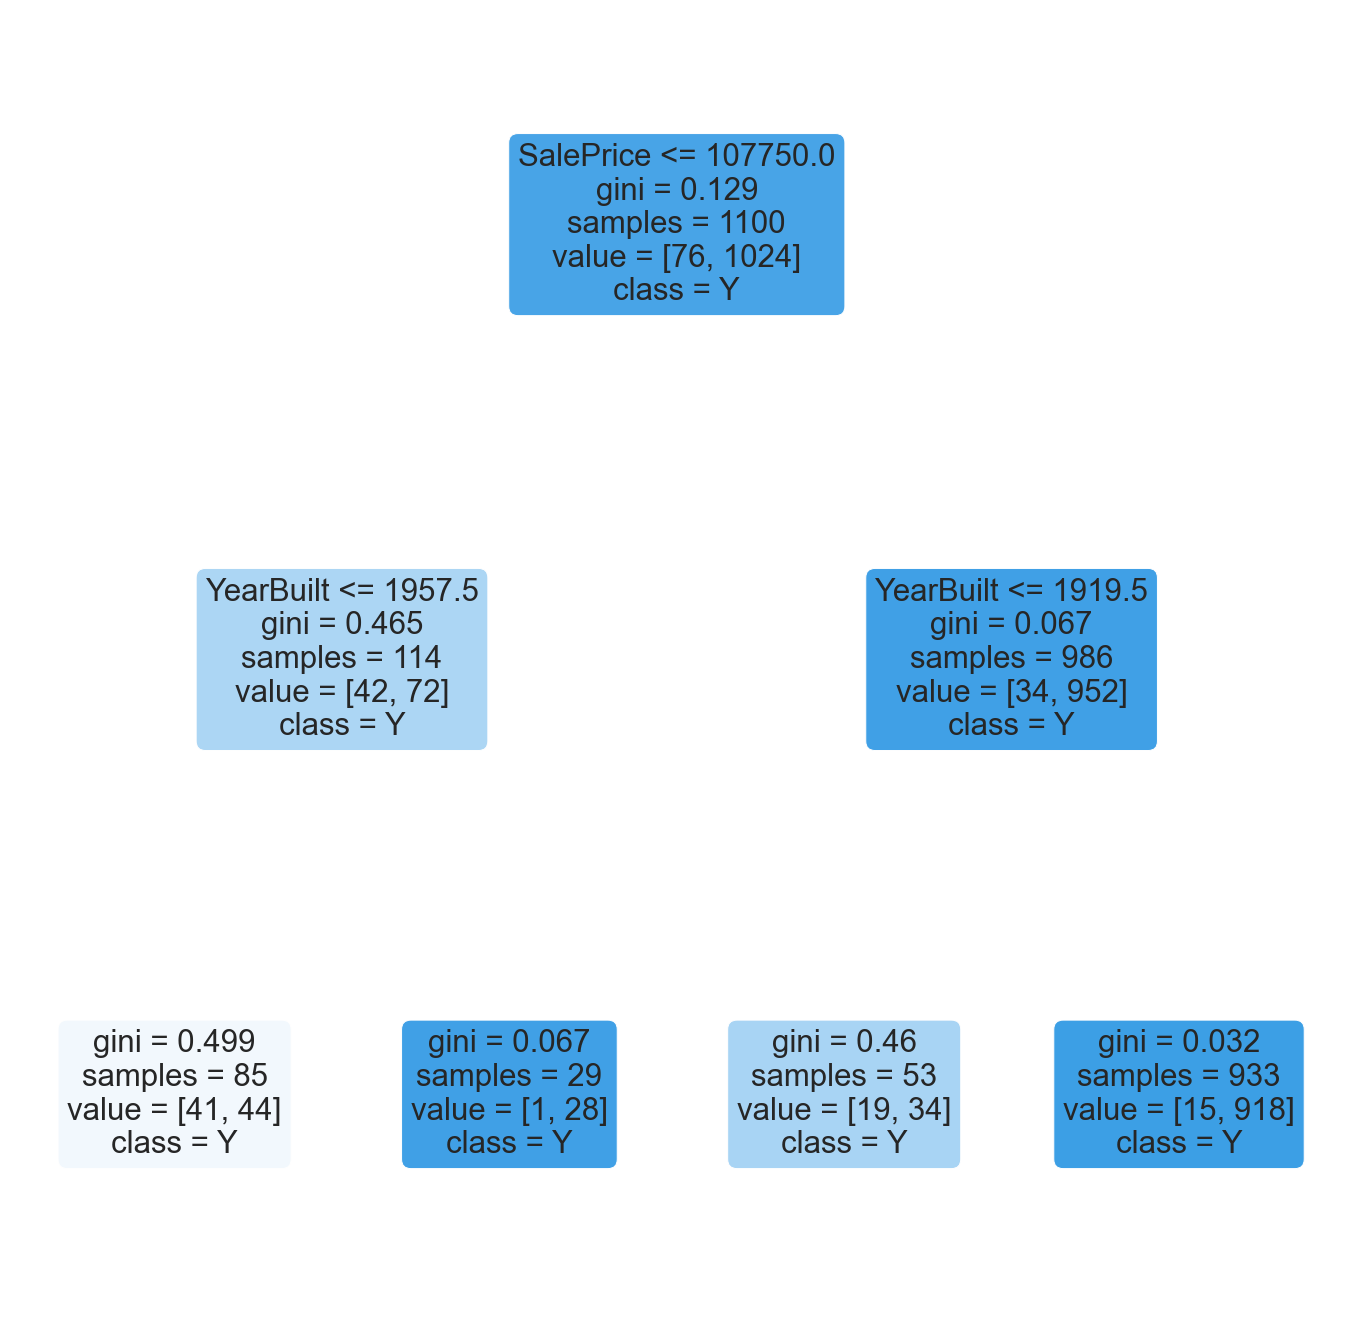

In [75]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9309090909090909

TPR Train :	 1.0
TNR Train :	 0.0

FPR Train :	 1.0
FNR Train :	 0.0


<AxesSubplot:>

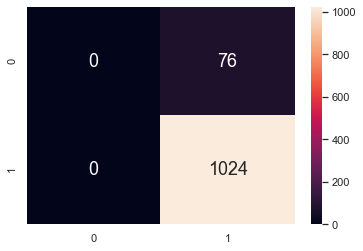

In [76]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9472222222222222

TPR Test :	 1.0
TNR Test :	 0.0

FPR Test :	 1.0
FNR Test :	 0.0


<AxesSubplot:>

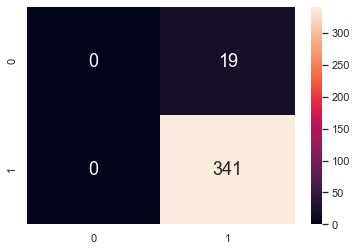

In [77]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Observation :** The model with `CentralAir` against all the four variables `SalePrice`, `GrLivArea`, `OverallQual`, `YearBuilt` is not necessarily better. That's strange! However, there is also room to play with the `max_depth` of the Decision Tree. Try other values and check out for yourself. :-)

Experiment with `max_depth` of the Decision Tree to check the variations in accuracy and confusion matrix for train and test. Think about it!

[Text(585.9000000000001, 1174.1760000000002, 'SalePrice <= 98300.0\ngini = 0.119\nsamples = 1100\nvalue = [70, 1030]\nclass = Y'),
 Text(279.0, 913.248, 'YearBuilt <= 1953.0\ngini = 0.495\nsamples = 84\nvalue = [38, 46]\nclass = Y'),
 Text(223.20000000000002, 652.3200000000002, 'SalePrice <= 62750.0\ngini = 0.464\nsamples = 60\nvalue = [38, 22]\nclass = N'),
 Text(111.60000000000001, 391.39200000000005, 'YearBuilt <= 1932.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]\nclass = N'),
 Text(55.800000000000004, 130.46400000000017, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = N'),
 Text(167.4, 130.46400000000017, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = N'),
 Text(334.8, 391.39200000000005, 'GrLivArea <= 1492.0\ngini = 0.494\nsamples = 47\nvalue = [26, 21]\nclass = N'),
 Text(279.0, 130.46400000000017, 'gini = 0.5\nsamples = 43\nvalue = [22, 21]\nclass = N'),
 Text(390.6, 130.46400000000017, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = N'),
 Text(334.8, 652.320000000000

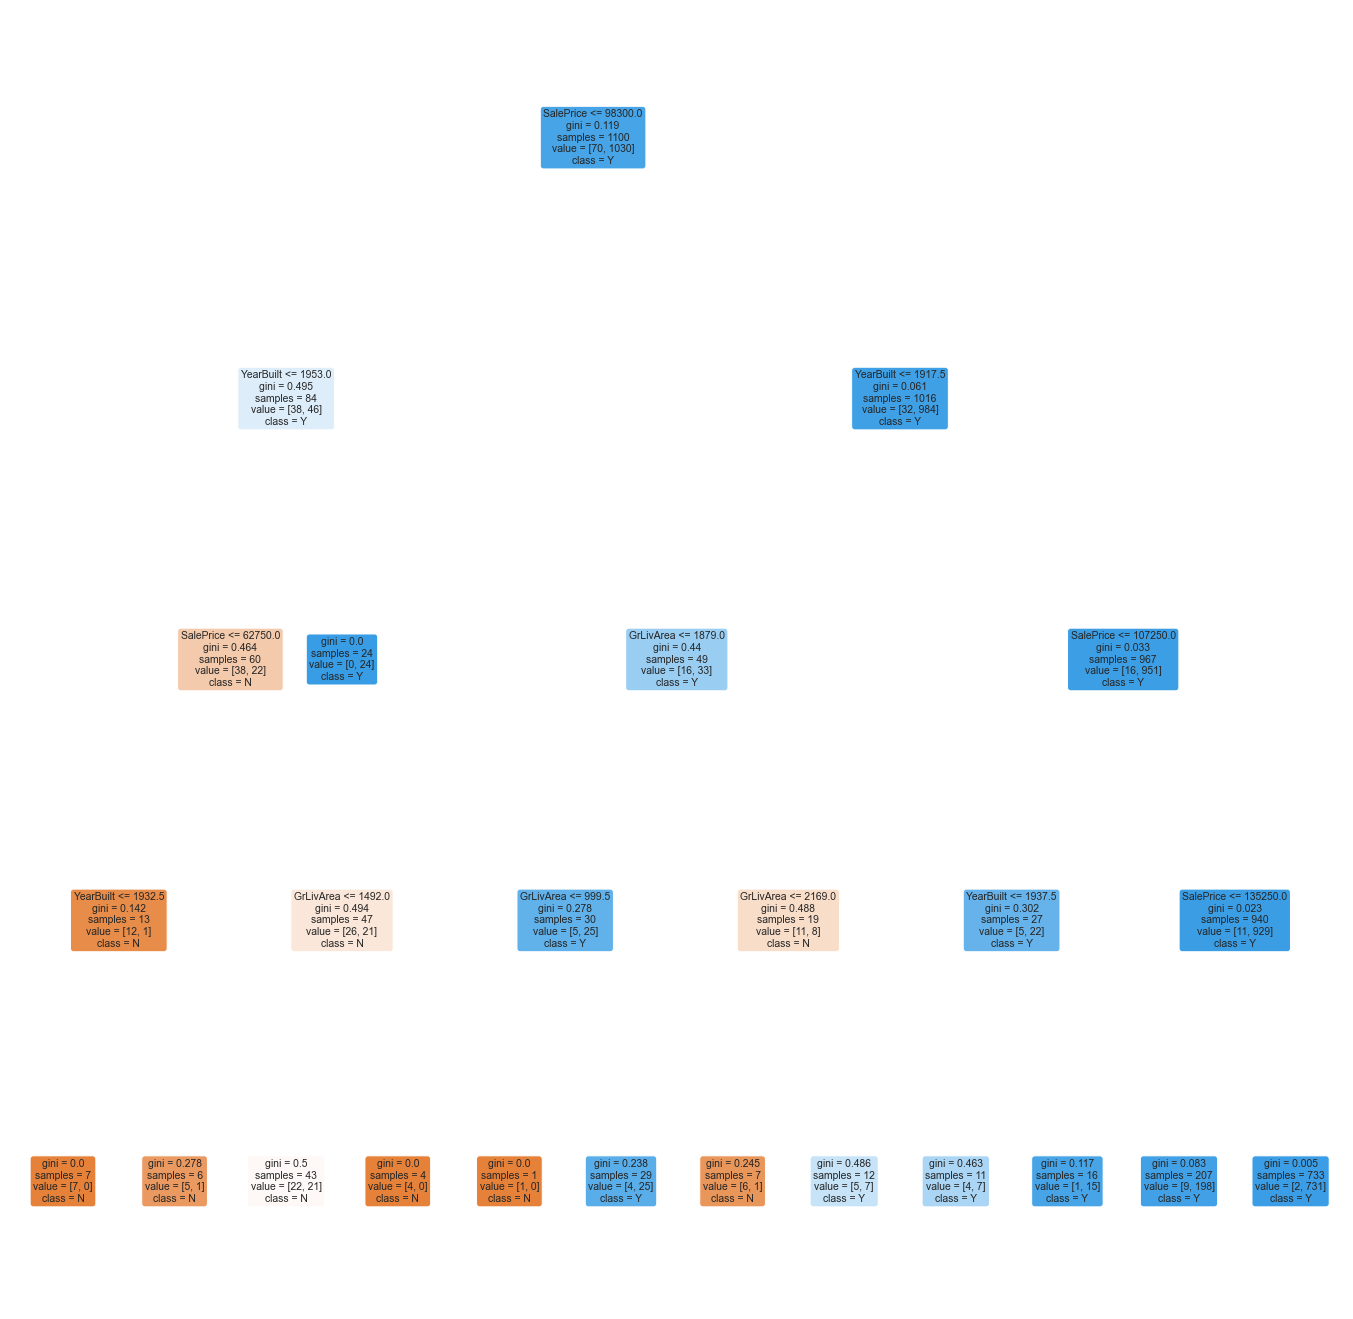

In [78]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData[['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # CHANGE IT HERE AND EXPERIMENT
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9563636363636364

TPR Train :	 0.9776699029126213
TNR Train :	 0.6428571428571429

FPR Train :	 0.35714285714285715
FNR Train :	 0.02233009708737864


<AxesSubplot:>

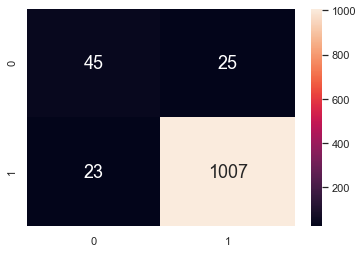

In [79]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9305555555555556

TPR Test :	 0.9701492537313433
TNR Test :	 0.4

FPR Test :	 0.6
FNR Test :	 0.029850746268656716


<AxesSubplot:>

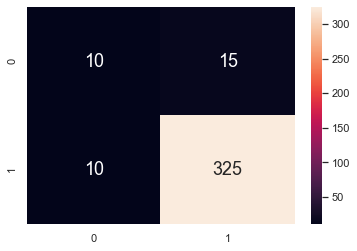

In [80]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})